In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask

In [8]:
gdf = gpd.read_file('F:\\Milan_LinkedIn\\ne_10m_admin_0_countries')
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [9]:
[k for k in list(gdf.keys()) if 'cont' in k.lower()]

['CONTINENT']

In [10]:
print(len(gdf))
gdf = gdf[gdf.CONTINENT == 'Asia']
print(len(gdf))

258
59


<Axes: >

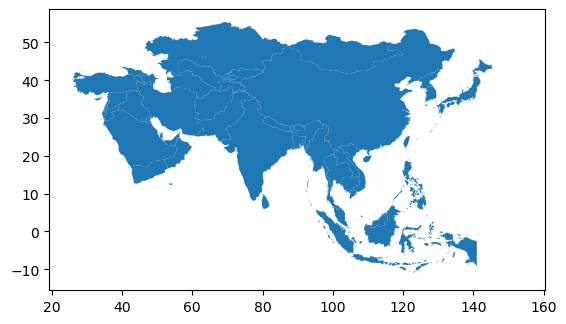

In [11]:
gdf.plot()

In [6]:
bbox = gpd.read_file('bbox.geojson')

<Axes: >

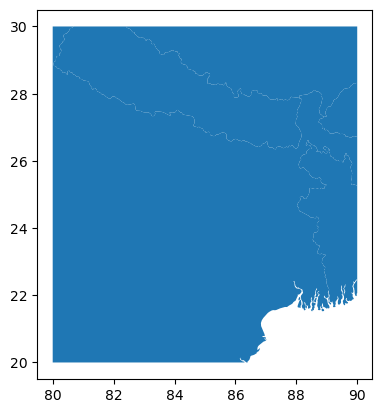

In [12]:
gdf = gpd.overlay(gdf, bbox)
gdf.plot()

In [13]:
output_file = 'clipped_raster.tiff'

with rasterio.open(output_file) as src:
    out_image = src.read(1)
    out_transform = src.transform

    polygon_sums = []

    for idx, polygon in gdf.iterrows():
        #masking
        geom = [polygon['geometry']]
        out_image_masked, out_transform_masked = mask(src, geom, crop = True)

        #data
        out_image_masked = out_image_masked[0]
        valid_data = out_image_masked[out_image_masked != src.nodata]

        #stats
        polygon_sum = valid_data.sum()
        polygon_sums.append(polygon_sum)

In [15]:
gdf['total_population'] = polygon_sums

In [16]:
gdf[['SOVEREIGNT', 'geometry', 'total_population']].head()

,SOVEREIGNT,geometry,total_population
0,India,"MULTIPOLYGON (((80.68017 29.99207, 80.65413 29...",5.052267e+08
1,China,"POLYGON ((89.99045 28.32062, 89.97159 28.31804...",2.907412e+05
2,Bhutan,"POLYGON ((89.97526 26.73186, 89.91211 26.71672...",5.994457e+05
3,Bangladesh,"MULTIPOLYGON (((89.99635 22.00023, 90 22.009, ...",6.717026e+07
4,Nepal,"POLYGON ((88.14302 27.85572, 88.15641 27.85127...",3.104418e+07


(79.5, 90.5, 19.5, 30.5)

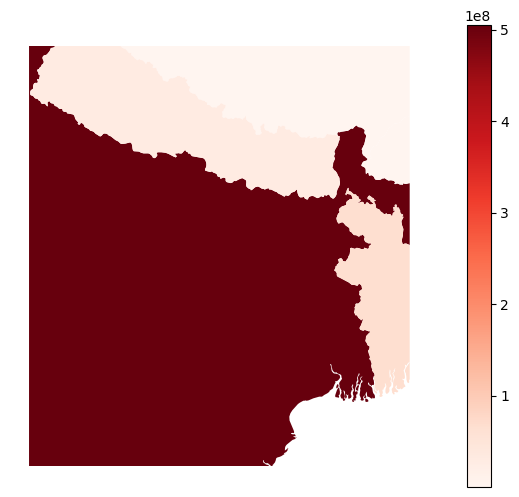

In [17]:
f, ax = plt.subplots(1,1, figsize= (10,6))
gdf.plot(ax = ax, column = 'total_population', cmap = 'Reds', legend = True)
ax.axis('off')